In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

## Tải dữ liệu

In [8]:
data_KH = pd.read_csv('../data/raw/vnexpress_khoahoc_raw_data.csv')
data_CN = pd.read_csv('../data/raw/vnexpress_congnghe_raw_data.csv')

### Kiểm tra các giá trị thiếu, thông tin và mô tả dữ liệu

In [9]:
missing_values_KH = data_KH.isnull().sum() / len(data_KH) * 100
missing_values_CN = data_CN.isnull().sum() / len(data_CN) * 100
missing_values_KH, missing_values_CN

(title               0.000000
 description         0.344828
 date                0.344828
 category            0.000000
 thumbnail           5.689655
 content             0.000000
 author              0.000000
 tags                0.000000
 group               0.000000
 nums_of_comments    0.000000
 url                 0.000000
 dtype: float64,
 title                0.000000
 description          0.000000
 date                 0.000000
 category             9.271523
 thumbnail            1.324503
 content              0.496689
 author              41.721854
 tags                 0.000000
 group                0.000000
 nums_of_comments     0.000000
 url                  0.000000
 dtype: float64)

In [10]:
data_KH.info()
data_CN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             580 non-null    object
 1   description       578 non-null    object
 2   date              578 non-null    object
 3   category          580 non-null    object
 4   thumbnail         547 non-null    object
 5   content           580 non-null    object
 6   author            580 non-null    object
 7   tags              580 non-null    object
 8   group             580 non-null    object
 9   nums_of_comments  580 non-null    int64 
 10  url               580 non-null    object
dtypes: int64(1), object(10)
memory usage: 50.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             604 non-null    object
 1

In [11]:
print(data_KH.describe())
print(data_CN.describe())

       nums_of_comments
count        580.000000
mean          17.463793
std           24.997625
min            0.000000
25%            2.000000
50%            8.000000
75%           22.000000
max          178.000000
       nums_of_comments
count        604.000000
mean          40.675497
std           59.379159
min            0.000000
25%            3.000000
50%           18.000000
75%           50.000000
max          389.000000


### Chuẩn hóa dữ liệu

In [12]:
data_KH = data_KH.drop(columns='thumbnail')
data_CN = data_CN.drop(columns='thumbnail')

In [ ]:
# Chuẩn hóa cột ngày tháng
df = data_KH
df['date_clean'] = df['date'].str.split(', ', n=1).str[1]
df['date'] = pd.to_datetime(df['date_clean'], format='%d/%m/%Y, %H:%M (GMT+7)', errors='coerce')

# Tạo các đặc trưng thời gian
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # 0 là Monday, 6 là Sunday

# Kiểm tra giá trị null sau khi chuyển đổi
print(f"Số lượng giá trị ngày tháng hợp lệ: {df['date'].notnull().sum()} ({df['date'].notnull().sum()/len(df)*100:.2f}%)")
print(f"Số lượng giá trị ngày tháng không hợp lệ: {df['date'].isnull().sum()} ({df['date'].isnull().sum()/len(df)*100:.2f}%)")

Số lượng giá trị ngày tháng hợp lệ: 578 (99.66%)
Số lượng giá trị ngày tháng không hợp lệ: 2 (0.34%)


In [14]:
# Chuẩn hóa cột ngày tháng
df = data_CN
df['date_clean'] = df['date'].str.split(', ', n=1).str[1]
df['date'] = pd.to_datetime(df['date_clean'], format='%d/%m/%Y, %H:%M (GMT+7)', errors='coerce')

# Tạo các đặc trưng thời gian
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # 0 là Monday, 6 là Sunday

# Kiểm tra giá trị null sau khi chuyển đổi
print(f"Số lượng giá trị ngày tháng hợp lệ: {df['date'].notnull().sum()} ({df['date'].notnull().sum()/len(df)*100:.2f}%)")
print(f"Số lượng giá trị ngày tháng không hợp lệ: {df['date'].isnull().sum()} ({df['date'].isnull().sum()/len(df)*100:.2f}%)")

Số lượng giá trị ngày tháng hợp lệ: 604 (100.00%)
Số lượng giá trị ngày tháng không hợp lệ: 0 (0.00%)


In [15]:
#Split the strings on the "\\r\\n" characters
split_data_KH_KH = data_KH['title'].str.split('\\r\\n')
# delete rows containing "\\r\\n"
data_KH = data_KH[~data_KH.title.str.contains('\\r\\n')]

split_data_KH_CN = data_CN['title'].str.split('\\r\\n')
# delete rows containing "\\r\\n"
data_CN = data_CN[~data_CN.title.str.contains('\\r\\n')]

In [16]:
#Split the strings on the "\\r\\n" characters
data_KH['tags'] = data_KH['tags'].str.replace('\n', '')
data_KH['author'] = data_KH['author'].str.replace('\n', '')

data_CN['tags'] = data_CN['tags'].str.replace('\n', '')
data_CN['author'] = data_CN['author'].str.replace('\n', '')


In [17]:
# Gán lại kết quả vào DataFrame
data_KH['group'] = data_KH['group'].fillna("Khoa học")
data_CN['group'] = data_CN['group'].fillna("Công nghệ")


In [18]:
data_KH = data_KH.drop_duplicates(subset=['title'], keep='last')
data_CN = data_CN.drop_duplicates(subset=['title'], keep='last')

## Vẽ biểu đồ đơn biến

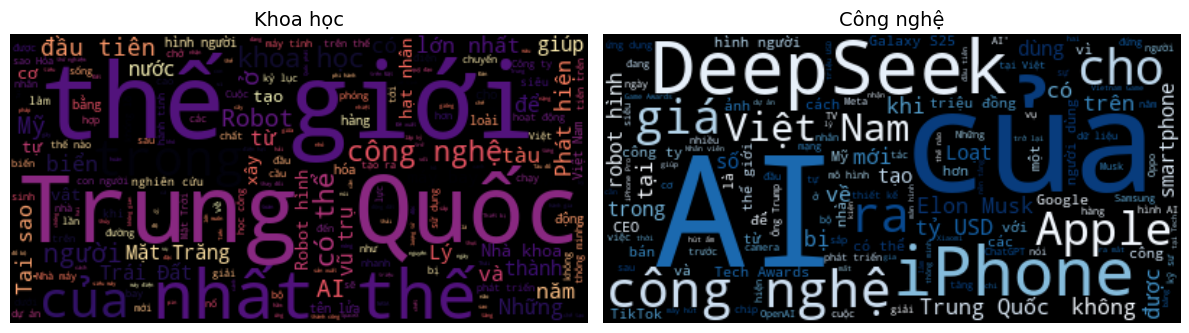

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo WordCloud cho Khoa học
text_KH = ' '.join(data_KH['title'].astype(str).tolist())
cloud_KH = WordCloud(colormap='magma').generate(text_KH)

# Tạo WordCloud cho Công nghệ
text_CN = ' '.join(data_CN['title'].astype(str).tolist())
cloud_CN = WordCloud(colormap='Blues').generate(text_CN)

# Hiển thị 2 biểu đồ cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ WordCloud Khoa học
axes[0].imshow(cloud_KH, interpolation='bilinear')
axes[0].set_title("Khoa học", fontsize=14)
axes[0].axis('off')

# Biểu đồ WordCloud Công nghệ
axes[1].imshow(cloud_CN, interpolation='bilinear')
axes[1].set_title("Công nghệ", fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()


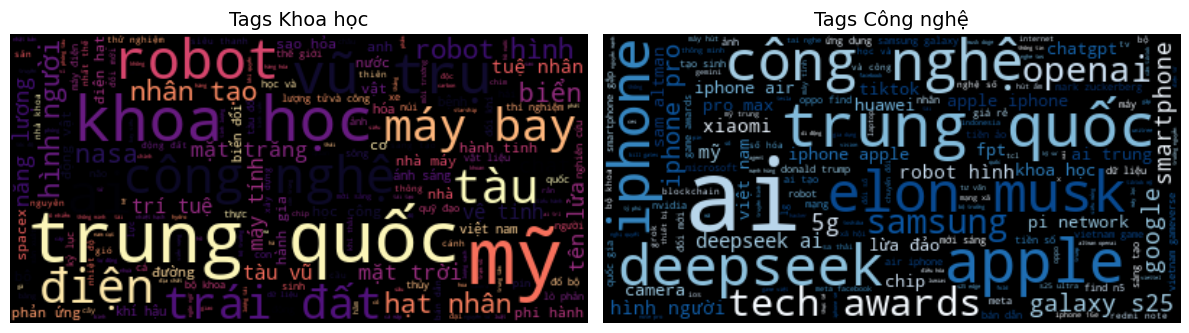

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo WordCloud cho tags Khoa học
text_KH = ' '.join(data_KH['tags'].astype(str).tolist())
cloud_KH = WordCloud(colormap='magma').generate(text_KH)

# Tạo WordCloud cho tags Công nghệ
text_CN = ' '.join(data_CN['tags'].astype(str).tolist())
cloud_CN = WordCloud(colormap='Blues').generate(text_CN)

# Hiển thị 2 biểu đồ cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ WordCloud tags Khoa học
axes[0].imshow(cloud_KH, interpolation='bilinear')
axes[0].set_title("Tags Khoa học", fontsize=14)
axes[0].axis('off')

# Biểu đồ WordCloud tags Công nghệ
axes[1].imshow(cloud_CN, interpolation='bilinear')
axes[1].set_title("Tags Công nghệ", fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()


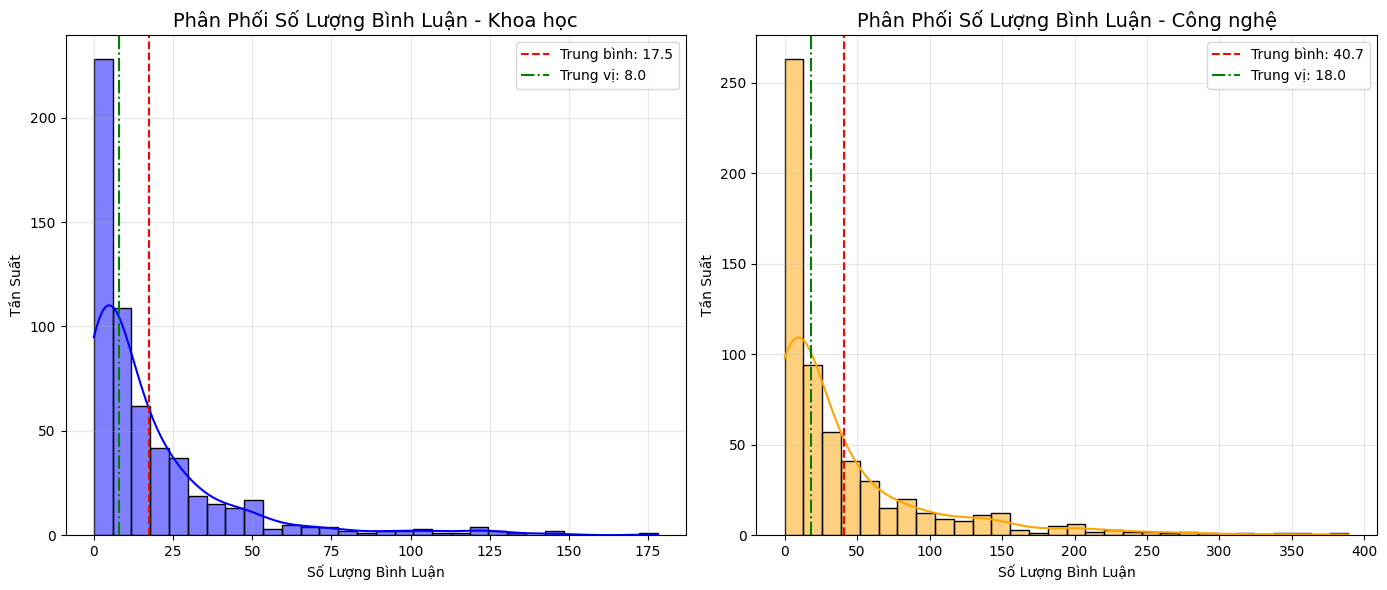

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
df_KH = data_KH.copy()
df_CN = data_CN.copy()

# Điền giá trị thiếu cho cả hai dataset
df_KH.fillna({'category': 'Khác', 'author': 'Không xác định', 'content': ''}, inplace=True)
df_CN.fillna({'category': 'Khác', 'author': 'Không xác định', 'content': ''}, inplace=True)

# Tạo figure với 2 biểu đồ cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ phân phối số lượng bình luận của data_KH
sns.histplot(df_KH['nums_of_comments'], kde=True, bins=30, ax=axes[0], color='blue')
axes[0].set_title('Phân Phối Số Lượng Bình Luận - Khoa học', fontsize=14)
axes[0].set_xlabel('Số Lượng Bình Luận')
axes[0].set_ylabel('Tần Suất')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(df_KH['nums_of_comments'].mean(), color='r', linestyle='--', label=f'Trung bình: {df_KH["nums_of_comments"].mean():.1f}')
axes[0].axvline(df_KH['nums_of_comments'].median(), color='g', linestyle='-.', label=f'Trung vị: {df_KH["nums_of_comments"].median():.1f}')
axes[0].legend()

# Biểu đồ phân phối số lượng bình luận của data_CN
sns.histplot(df_CN['nums_of_comments'], kde=True, bins=30, ax=axes[1], color='orange')
axes[1].set_title('Phân Phối Số Lượng Bình Luận - Công nghệ', fontsize=14)
axes[1].set_xlabel('Số Lượng Bình Luận')
axes[1].set_ylabel('Tần Suất')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(df_CN['nums_of_comments'].mean(), color='r', linestyle='--', label=f'Trung bình: {df_CN["nums_of_comments"].mean():.1f}')
axes[1].axvline(df_CN['nums_of_comments'].median(), color='g', linestyle='-.', label=f'Trung vị: {df_CN["nums_of_comments"].median():.1f}')
axes[1].legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


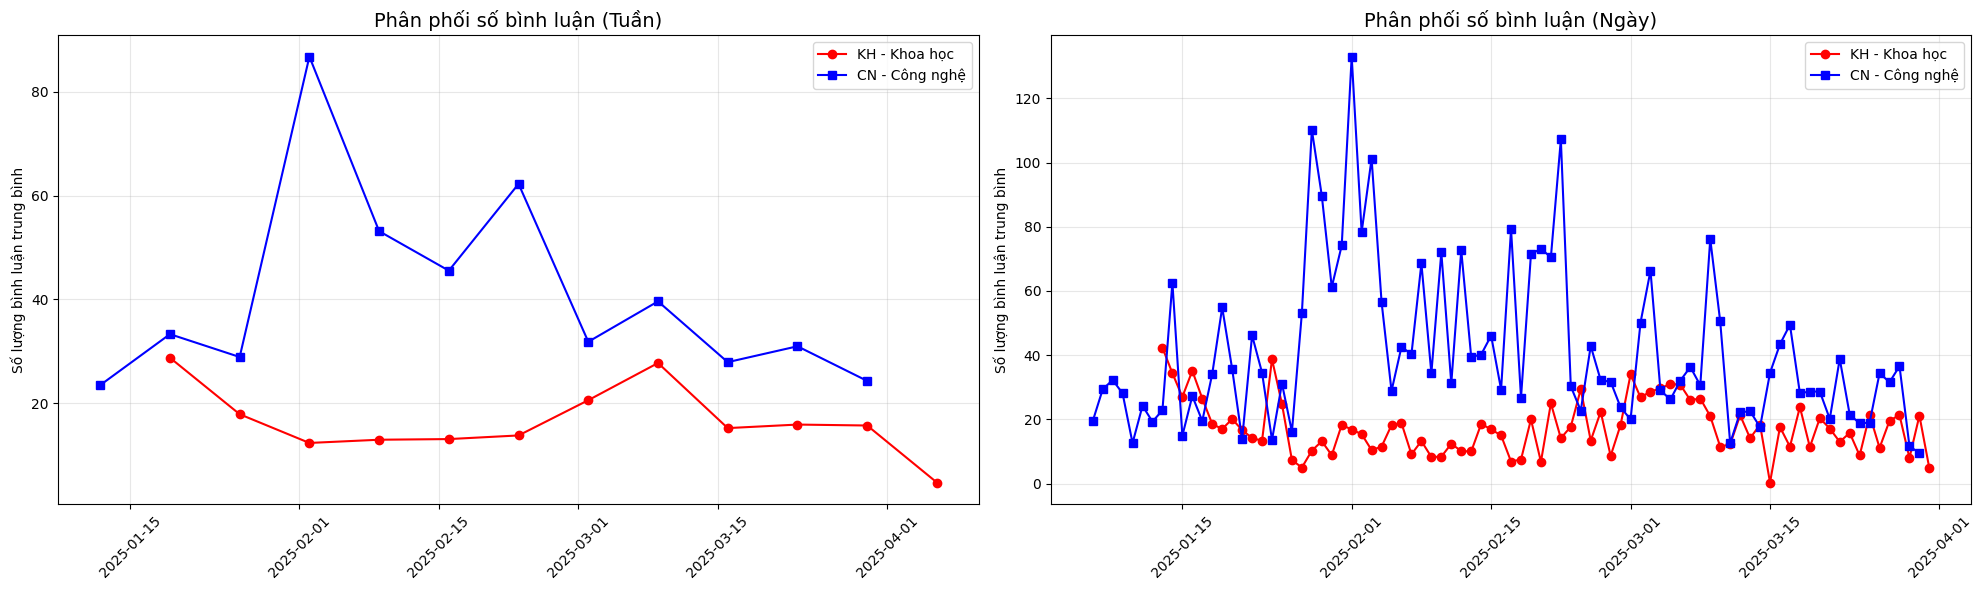

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'nums_of_comments' is numeric
data_KH['nums_of_comments'] = pd.to_numeric(data_KH['nums_of_comments'], errors='coerce').fillna(0)
data_CN['nums_of_comments'] = pd.to_numeric(data_CN['nums_of_comments'], errors='coerce').fillna(0)

# Convert 'date_clean' to datetime format
data_KH['date_clean'] = pd.to_datetime(data_KH['date_clean'], format='%d/%m/%Y, %H:%M (GMT+7)', errors='coerce')
data_CN['date_clean'] = pd.to_datetime(data_CN['date_clean'], format='%d/%m/%Y, %H:%M (GMT+7)', errors='coerce')

# Function to aggregate data
def aggregate_data(data, freq):
    return data.groupby(pd.Grouper(key='date_clean', freq=freq))['nums_of_comments'].mean().dropna()

df_KH_weekly = aggregate_data(data_KH, 'W')
df_KH_daily = aggregate_data(data_KH, 'D')

df_CN_weekly = aggregate_data(data_CN, 'W')
df_CN_daily = aggregate_data(data_CN, 'D')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=False)

# Function to plot data with correct time formatting
def plot_data(ax, df_KH, df_CN, title, color_KH='red', color_CN='blue'):
    ax.plot(df_KH.index, df_KH, label='KH - Khoa học', linestyle='-', marker='o', color=color_KH)
    ax.plot(df_CN.index, df_CN, label='CN - Công nghệ', linestyle='-', marker='s', color=color_CN)
    ax.set_title(f"Phân phối số bình luận ({title})", fontsize=14)
    ax.set_ylabel("Số lượng bình luận trung bình")
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Format X-axis for better visualization
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    ax.tick_params(axis='x', rotation=45)  # Rotate labels for better readability

# Plot weekly and daily comparisons
plot_data(axes[0], df_KH_weekly, df_CN_weekly, "Tuần")
plot_data(axes[1], df_KH_daily, df_CN_daily, "Ngày")

plt.tight_layout()
plt.show()


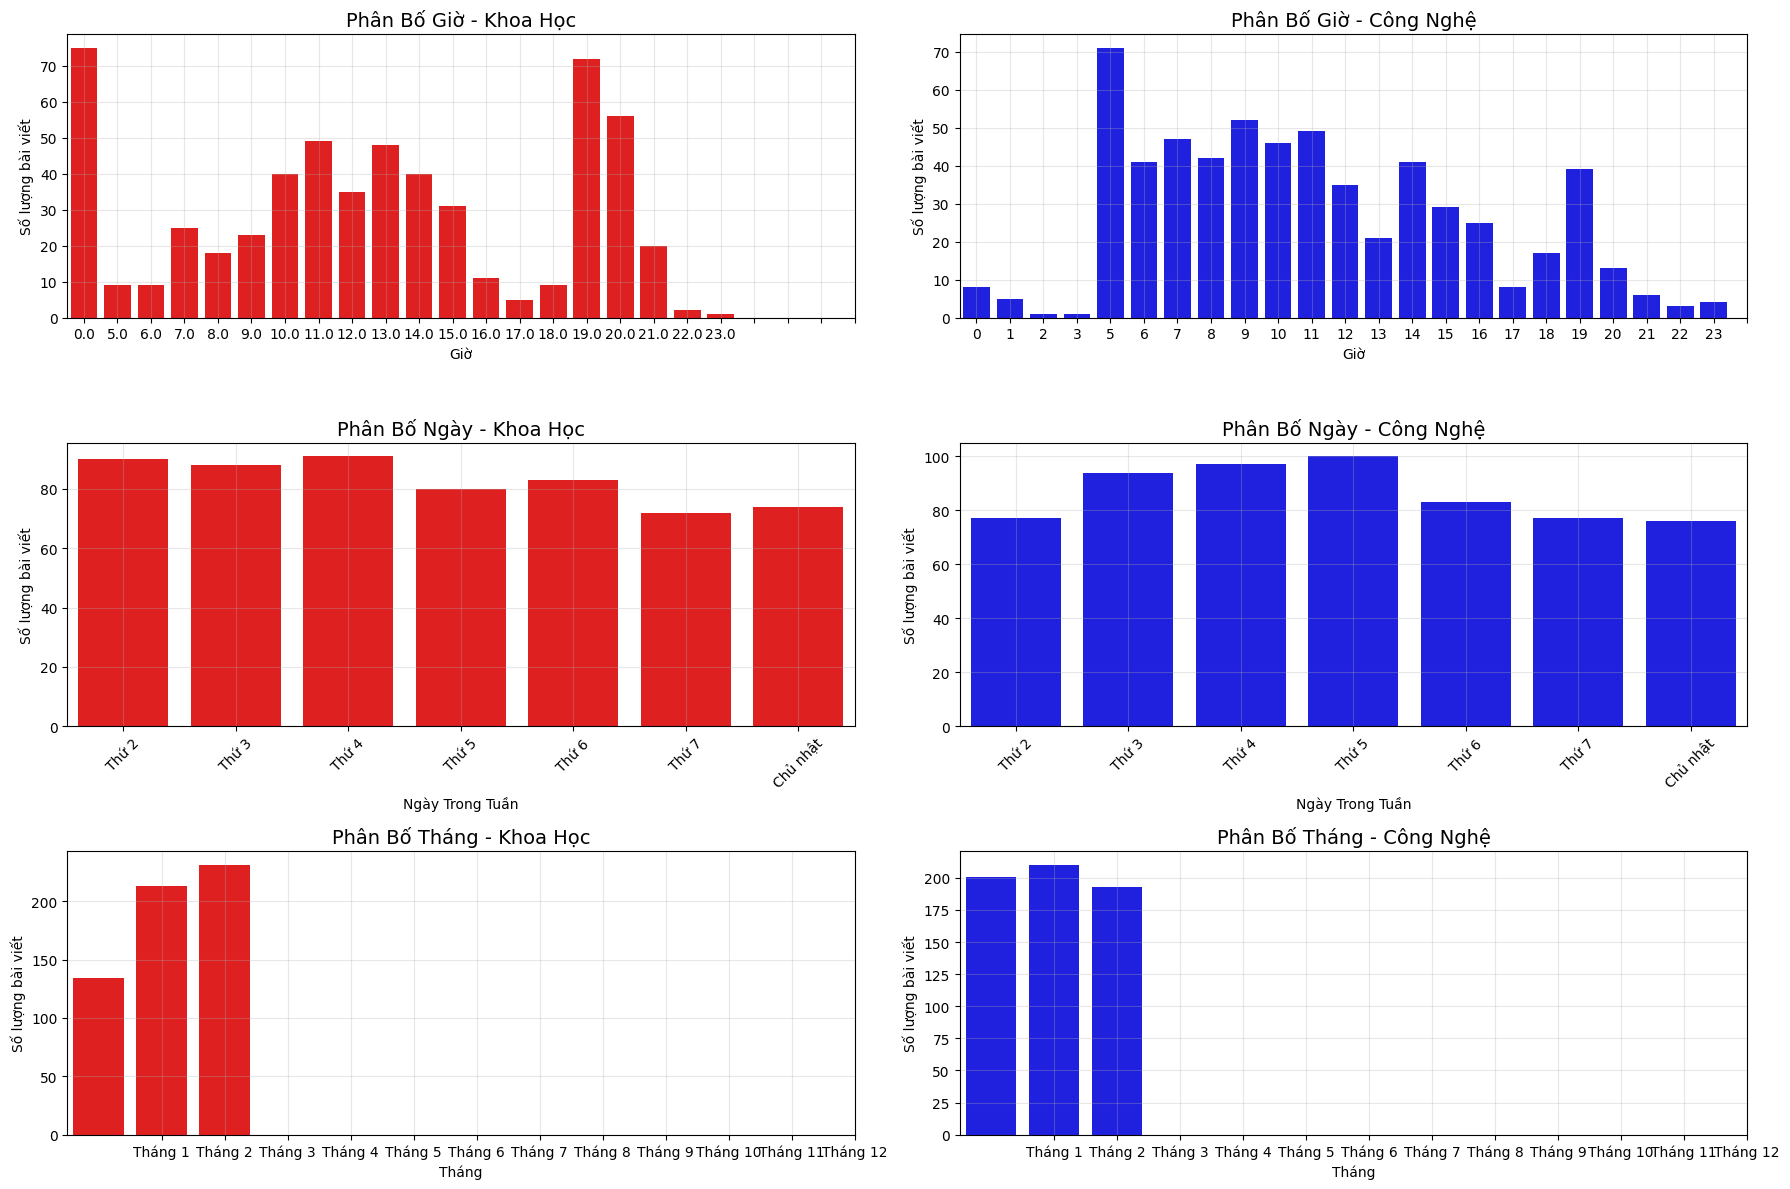

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển đổi cột thời gian về dạng datetime
data_KH['date_clean'] = pd.to_datetime(data_KH['date_clean'], format='%d/%m/%Y, %H:%M (GMT+7)', errors='coerce')
data_CN['date_clean'] = pd.to_datetime(data_CN['date_clean'], format='%d/%m/%Y, %H:%M (GMT+7)', errors='coerce')

# Tạo các cột phụ để phân tích theo thời gian
data_KH['hour'] = data_KH['date_clean'].dt.hour
data_KH['day_of_week'] = data_KH['date_clean'].dt.weekday  # Thứ 2 là 0, Chủ nhật là 6
data_KH['month'] = data_KH['date_clean'].dt.month

data_CN['hour'] = data_CN['date_clean'].dt.hour
data_CN['day_of_week'] = data_CN['date_clean'].dt.weekday
data_CN['month'] = data_CN['date_clean'].dt.month

# Tạo figure với 3 hàng, 2 cột
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Danh sách ngày trong tuần để hiển thị
days = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ nhật']

# Biểu đồ phân bố bài viết theo giờ
hour_counts_KH = data_KH['hour'].value_counts().sort_index()
hour_counts_CN = data_CN['hour'].value_counts().sort_index()

sns.barplot(x=hour_counts_KH.index, y=hour_counts_KH.values, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Phân Bố Giờ - Khoa Học', fontsize=14)
axes[0, 0].set_xlabel('Giờ')
axes[0, 0].set_ylabel('Số lượng bài viết')
axes[0, 0].set_xticks(range(24))
axes[0, 0].grid(True, alpha=0.3)

sns.barplot(x=hour_counts_CN.index, y=hour_counts_CN.values, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Phân Bố Giờ - Công Nghệ', fontsize=14)
axes[0, 1].set_xlabel('Giờ')
axes[0, 1].set_ylabel('Số lượng bài viết')
axes[0, 1].set_xticks(range(24))
axes[0, 1].grid(True, alpha=0.3)

# Biểu đồ phân bố bài viết theo ngày trong tuần
day_counts_KH = data_KH['day_of_week'].value_counts().sort_index()
day_counts_CN = data_CN['day_of_week'].value_counts().sort_index()

sns.barplot(x=day_counts_KH.index, y=day_counts_KH.values, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Phân Bố Ngày - Khoa Học', fontsize=14)
axes[1, 0].set_xlabel('Ngày Trong Tuần')
axes[1, 0].set_ylabel('Số lượng bài viết')
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(days, rotation=45)
axes[1, 0].grid(True, alpha=0.3)

sns.barplot(x=day_counts_CN.index, y=day_counts_CN.values, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Phân Bố Ngày - Công Nghệ', fontsize=14)
axes[1, 1].set_xlabel('Ngày Trong Tuần')
axes[1, 1].set_ylabel('Số lượng bài viết')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(days, rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# Biểu đồ phân bố bài viết theo tháng
full_months = range(1, 13)
month_counts_KH = data_KH['month'].value_counts().reindex(full_months, fill_value=0).sort_index()
month_counts_CN = data_CN['month'].value_counts().reindex(full_months, fill_value=0).sort_index()

sns.barplot(x=month_counts_KH.index, y=month_counts_KH.values, ax=axes[2, 0], color='red')
axes[2, 0].set_title('Phân Bố Tháng - Khoa Học', fontsize=14)
axes[2, 0].set_xlabel('Tháng')
axes[2, 0].set_ylabel('Số lượng bài viết')
axes[2, 0].set_xticks(full_months)
axes[2, 0].set_xticklabels([f'Tháng {m}' for m in full_months])
axes[2, 0].grid(True, alpha=0.3)

sns.barplot(x=month_counts_CN.index, y=month_counts_CN.values, ax=axes[2, 1], color='blue')
axes[2, 1].set_title('Phân Bố Tháng - Công Nghệ', fontsize=14)
axes[2, 1].set_xlabel('Tháng')
axes[2, 1].set_ylabel('Số lượng bài viết')
axes[2, 1].set_xticks(full_months)
axes[2, 1].set_xticklabels([f'Tháng {m}' for m in full_months])
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

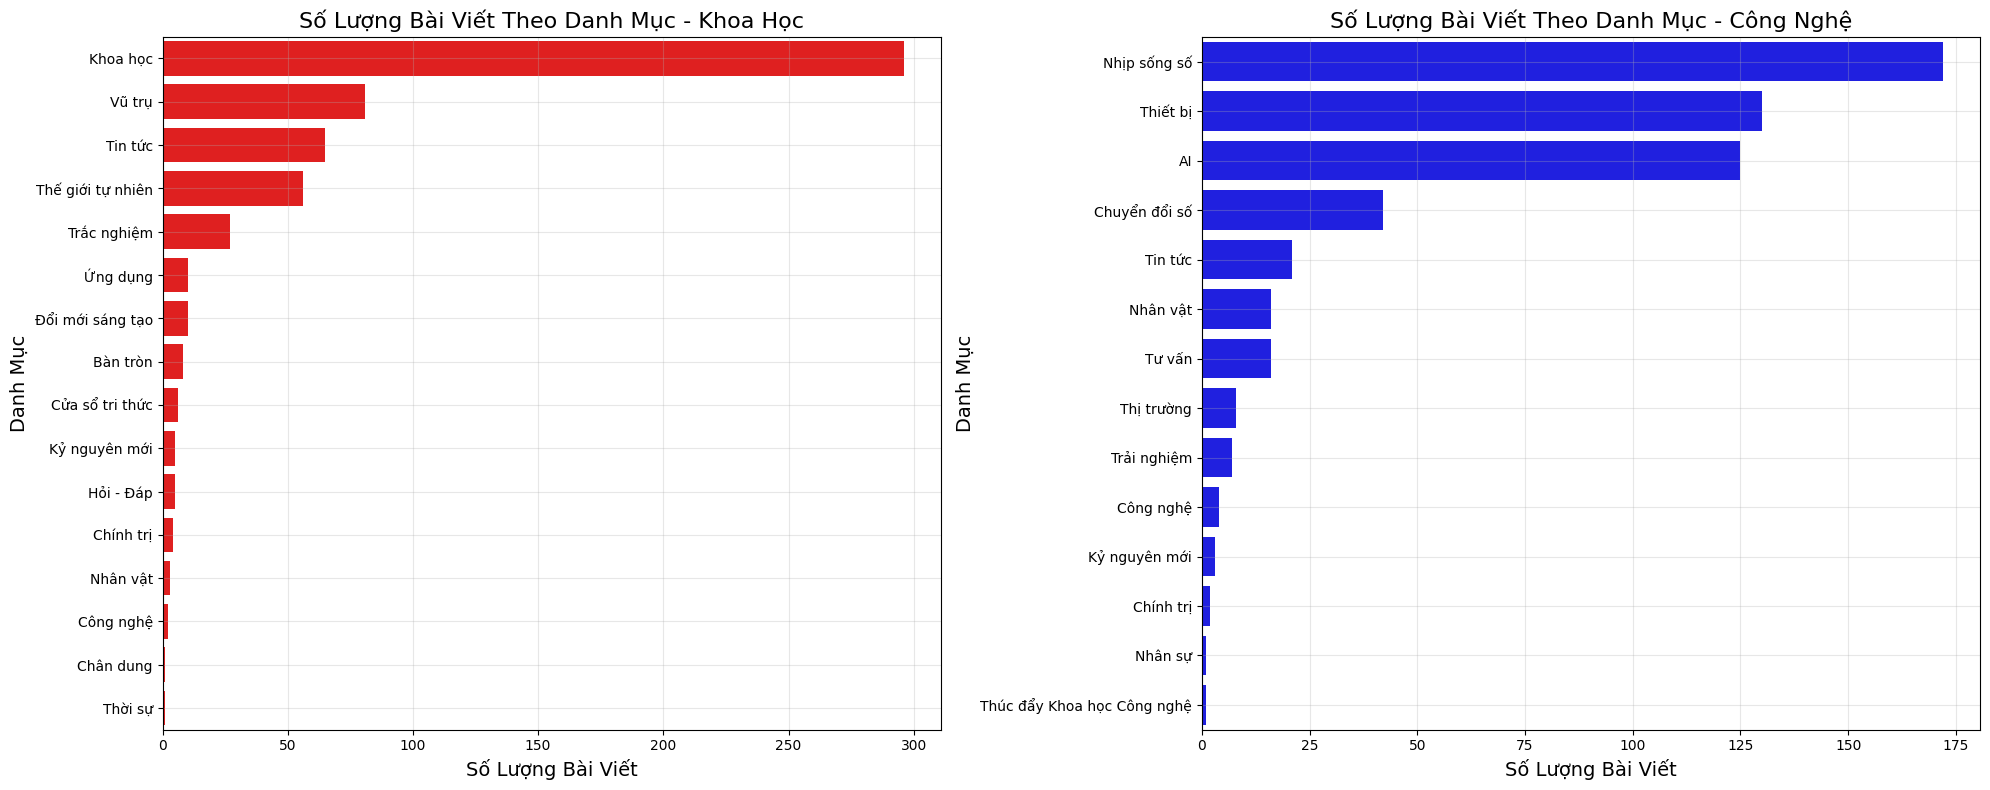

Tổng số danh mục - Khoa Học: 16

Phân bố theo danh mục - Khoa Học:
                   Số lượng  Phần trăm (%)
category                                  
Khoa học                296          51.03
Vũ trụ                   81          13.97
Tin tức                  65          11.21
Thế giới tự nhiên        56           9.66
Trắc nghiệm              27           4.66
Ứng dụng                 10           1.72
Đổi mới sáng tạo         10           1.72
Bàn tròn                  8           1.38
Cửa sổ tri thức           6           1.03
Kỷ nguyên mới             5           0.86
Hỏi - Đáp                 5           0.86
Chính trị                 4           0.69
Nhân vật                  3           0.52
Công nghệ                 2           0.34
Chân dung                 1           0.17
Thời sự                   1           0.17

Tổng số danh mục - Công Nghệ: 14

Phân bố theo danh mục - Công Nghệ:
                             Số lượng  Phần trăm (%)
category                            

In [41]:
# Tạo figure với 1 hàng, 2 cột
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Biểu đồ cho data_KH
category_counts_KH = data_KH['category'].value_counts()
sns.barplot(y=category_counts_KH.index, x=category_counts_KH.values, ax=axes[0], color='red')
axes[0].set_title('Số Lượng Bài Viết Theo Danh Mục - Khoa Học', fontsize=16)
axes[0].set_xlabel('Số Lượng Bài Viết', fontsize=14)
axes[0].set_ylabel('Danh Mục', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Biểu đồ cho data_CN
category_counts_CN = data_CN['category'].value_counts()
sns.barplot(y=category_counts_CN.index, x=category_counts_CN.values, ax=axes[1], color='blue')
axes[1].set_title('Số Lượng Bài Viết Theo Danh Mục - Công Nghệ', fontsize=16)
axes[1].set_xlabel('Số Lượng Bài Viết', fontsize=14)
axes[1].set_ylabel('Danh Mục', fontsize=14)
axes[1].grid(True, alpha=0.3)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

# In thông tin
print(f"Tổng số danh mục - Khoa Học: {data_KH['category'].nunique()}")
print("\nPhân bố theo danh mục - Khoa Học:")
category_percentage_KH = (data_KH['category'].value_counts() / len(data_KH) * 100).round(2)
print(pd.DataFrame({'Số lượng': data_KH['category'].value_counts(),
                    'Phần trăm (%)': category_percentage_KH}))

print(f"\nTổng số danh mục - Công Nghệ: {data_CN['category'].nunique()}")
print("\nPhân bố theo danh mục - Công Nghệ:")
category_percentage_CN = (data_CN['category'].value_counts() / len(data_CN) * 100).round(2)
print(pd.DataFrame({'Số lượng': data_CN['category'].value_counts(),
                    'Phần trăm (%)': category_percentage_CN}))

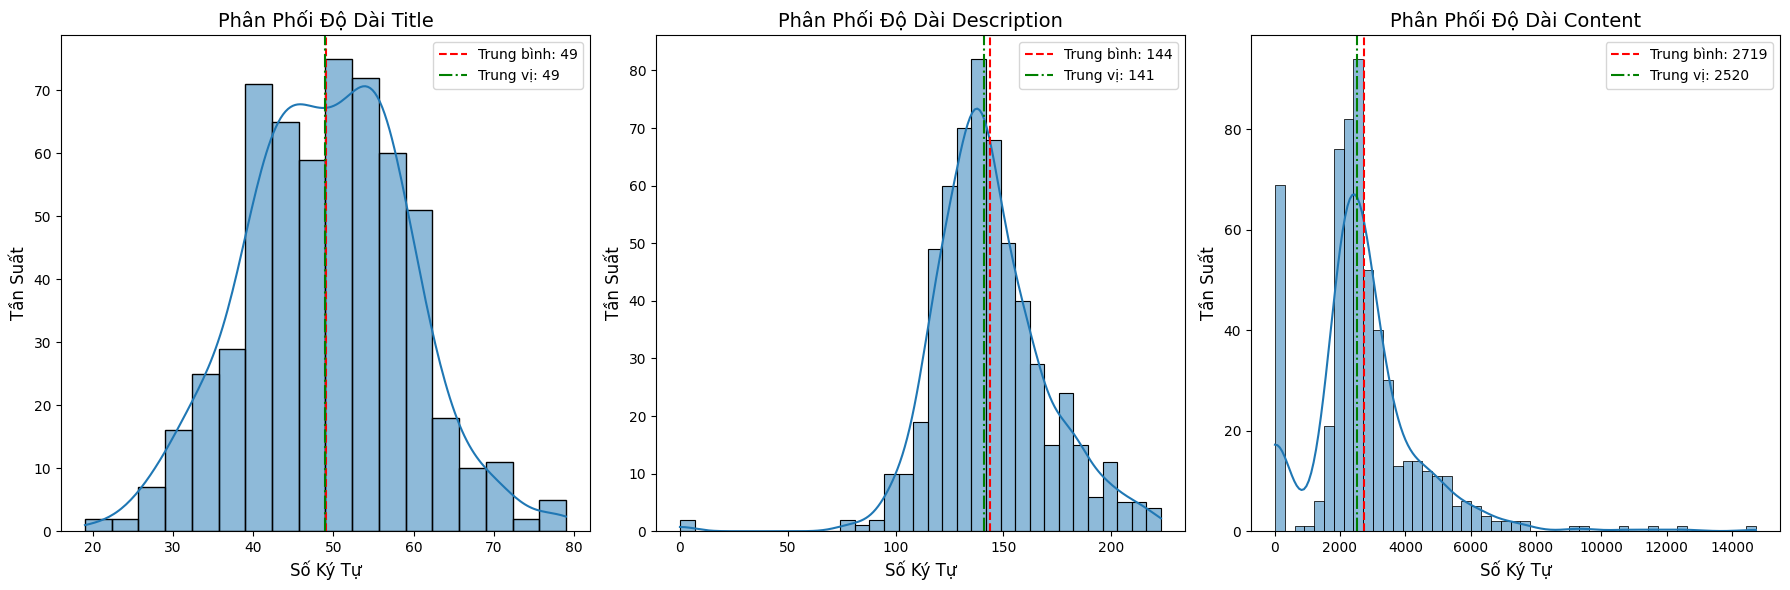

,Trung bình,Trung vị,Độ lệch chuẩn,Min,Max
Tiêu đề,49.13,49.0,10.03,19,79
Mô tả,143.57,141.0,26.03,0,223
Nội dung,2719.43,2520.5,1727.03,9,14732


In [42]:
# Tính độ dài của title, description và content
df = data_KH
df['title_length'] = df['title'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['description_length'] = df['description'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['content_length'] = df['content'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Tạo biểu đồ phân phối
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(['title_length', 'description_length', 'content_length']):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Phân Phối Độ Dài {column.split("_")[0].capitalize()}', fontsize=14)
    axes[i].set_xlabel('Số Ký Tự', fontsize=12)
    axes[i].set_ylabel('Tần Suất', fontsize=12)

    # Thêm trung bình và trung vị
    axes[i].axvline(df[column].mean(), color='r', linestyle='--', label=f'Trung bình: {df[column].mean():.0f}')
    axes[i].axvline(df[column].median(), color='g', linestyle='-.', label=f'Trung vị: {df[column].median():.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Thống kê cơ bản về độ dài
pd.DataFrame({
    'Trung bình': [df['title_length'].mean(), df['description_length'].mean(), df['content_length'].mean()],
    'Trung vị': [df['title_length'].median(), df['description_length'].median(), df['content_length'].median()],
    'Độ lệch chuẩn': [df['title_length'].std(), df['description_length'].std(), df['content_length'].std()],
    'Min': [df['title_length'].min(), df['description_length'].min(), df['content_length'].min()],
    'Max': [df['title_length'].max(), df['description_length'].max(), df['content_length'].max()]
}, index=['Tiêu đề', 'Mô tả', 'Nội dung']).round(2)

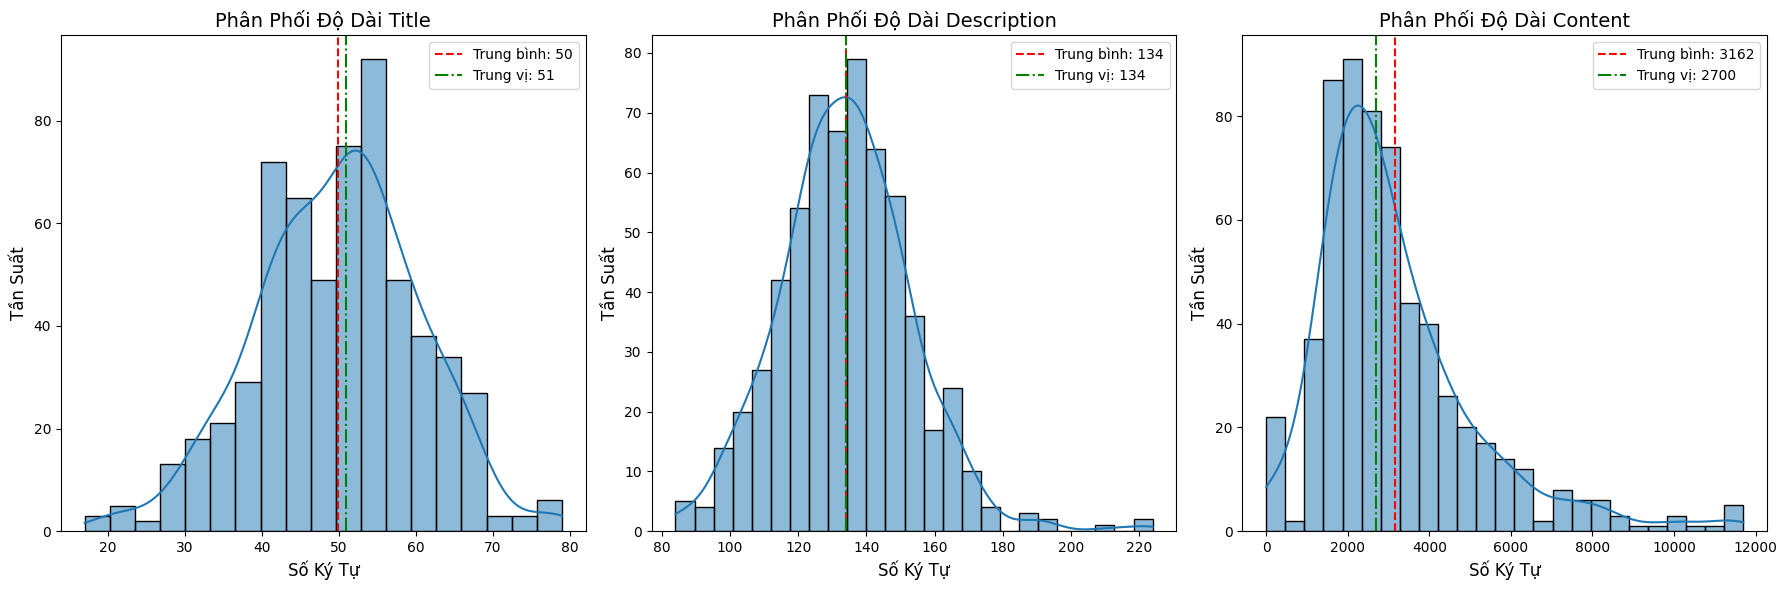

,Trung bình,Trung vị,Độ lệch chuẩn,Min,Max
Tiêu đề,49.88,51.0,10.63,17,79
Mô tả,134.01,134.0,19.32,84,224
Nội dung,3162.01,2699.5,1961.83,0,11702


In [43]:
# Tính độ dài của title, description và content
df = data_CN
df['title_length'] = df['title'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['description_length'] = df['description'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['content_length'] = df['content'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Tạo biểu đồ phân phối
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(['title_length', 'description_length', 'content_length']):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Phân Phối Độ Dài {column.split("_")[0].capitalize()}', fontsize=14)
    axes[i].set_xlabel('Số Ký Tự', fontsize=12)
    axes[i].set_ylabel('Tần Suất', fontsize=12)

    # Thêm trung bình và trung vị
    axes[i].axvline(df[column].mean(), color='r', linestyle='--', label=f'Trung bình: {df[column].mean():.0f}')
    axes[i].axvline(df[column].median(), color='g', linestyle='-.', label=f'Trung vị: {df[column].median():.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Thống kê cơ bản về độ dài
pd.DataFrame({
    'Trung bình': [df['title_length'].mean(), df['description_length'].mean(), df['content_length'].mean()],
    'Trung vị': [df['title_length'].median(), df['description_length'].median(), df['content_length'].median()],
    'Độ lệch chuẩn': [df['title_length'].std(), df['description_length'].std(), df['content_length'].std()],
    'Min': [df['title_length'].min(), df['description_length'].min(), df['content_length'].min()],
    'Max': [df['title_length'].max(), df['description_length'].max(), df['content_length'].max()]
}, index=['Tiêu đề', 'Mô tả', 'Nội dung']).round(2)